In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
number_of_points = 200
centers = [[-0.75, 0.75], [1, -1]]
X, y = datasets.make_blobs(n_samples = number_of_points, random_state = 90, centers = centers, cluster_std = 0.35)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(200, 1))

In [3]:
#Plot the generated data points
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

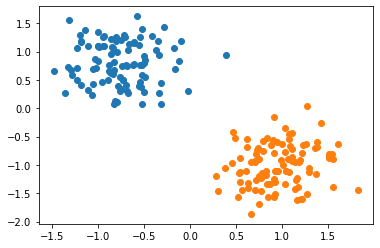

In [4]:
scatter_plot()

In [5]:
#Define the model
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred_prob = torch.sigmoid(self.linear(x))
        return pred_prob
    def pred_class(self, x):
        pred_prob = torch.sigmoid(self.linear(x))
        if pred_prob >= 0.5:
            return 1
        else:
            return 0

In [6]:
#Create the model
torch.manual_seed(2)
model = Model(2, 1)

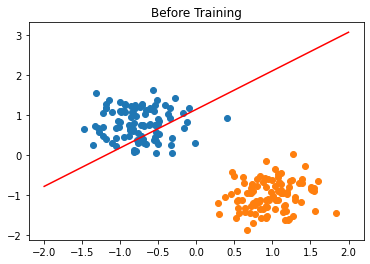

In [7]:
#Plot before training
plt.title('Before Training')
[w, b] = model.parameters()
w1, w2 = w[0][0].detach().numpy(), w[0][1].detach().numpy()
b = b[0].detach().numpy()
x1 = np.array([-2, 2])
x2 = (w1*x1 + b)/(-w2)
plt.plot(x1, x2, 'r')
scatter_plot()
plt.show()

In [8]:
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
#Training
epochs = 500
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = loss_function(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if ((i + 1) % 100 == 0) or (i == 0):
        print("epoch:", i + 1, "loss:", loss.item())
        

epoch: 1 loss: 0.5649825930595398
epoch: 100 loss: 0.3737054765224457
epoch: 200 loss: 0.27405837178230286
epoch: 300 loss: 0.21566075086593628
epoch: 400 loss: 0.17784596979618073
epoch: 500 loss: 0.15152111649513245


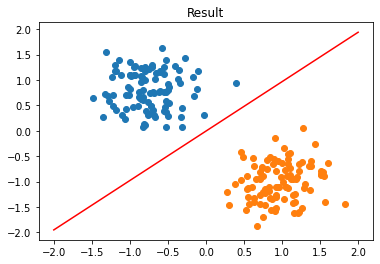

In [10]:
plt.title('Result')
[w, b] = model.parameters()
w1, w2 = w[0][0].detach().numpy(), w[0][1].detach().numpy()
b = b[0].detach().numpy()
x1 = np.array([-2, 2])
x2 = (w1*x1 + b)/(-w2)
plt.plot(x1, x2, 'r')
scatter_plot()
plt.show()